CH4+O2<=>CH3+HO2
nan
1986TSA/HAM1087
nan
2012HON/DAV3007-3013
current plot is  Review
current plot is  Experiment
[1.0, 1.0]
--------------interval is : 100
--------------interval is : 25
    allTemp     koriginal
0     300.0  3.607780e+12
1     400.0  3.607780e+12
2     500.0  3.607780e+12
3     600.0  3.607780e+12
4     700.0  3.607780e+12
5     800.0  3.607780e+12
6     900.0  3.607780e+12
7    1000.0  3.607780e+12
23   1072.0  4.402810e+12
24   1075.0  4.402810e+12
8    1100.0  3.607780e+12
25   1100.0  4.402810e+12
26   1125.0  4.402810e+12
27   1139.0  4.402810e+12
9    1200.0  3.607780e+12
10   1300.0  3.607780e+12
11   1400.0  3.607780e+12
12   1500.0  3.607780e+12
13   1600.0  3.607780e+12
14   1700.0  3.607780e+12
15   1800.0  3.607780e+12
16   1900.0  3.607780e+12
17   2000.0  3.607780e+12
18   2100.0  3.607780e+12
19   2200.0  3.607780e+12
20   2300.0  3.607780e+12
21   2400.0  3.607780e+12
22   2500.0  3.607780e+12
[ 1.40945920e+13 -1.68478879e-01  1.35686467e+02]
sum_erro

c:\Users\renxinrui\Documents\Wmp\rxr\overall\Utils\fit.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rangeGap = np.array(rangeGap)


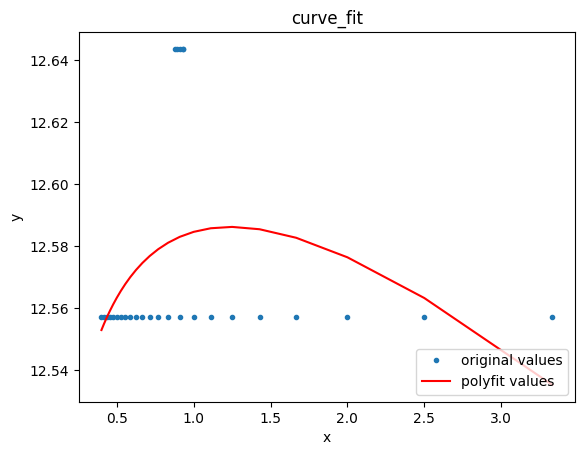

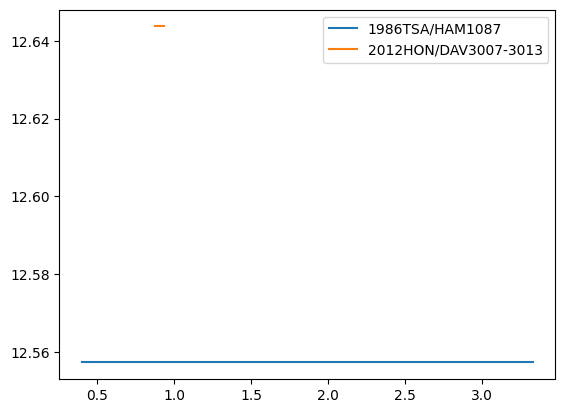

want to find  CH3+HO2<=>CH4+O2
TT find it  CH3+HO2<=>CH4+O2                                             +2.3200000E+005 +2.2300000E+000 -3.0220000E+003   !\2*A AUTHOR: !\REF: JASPER/ KLIPPENSTEIN PROC COMBUST INST 32 (2009) 279?86 !\COMMENT:

CH3 HO2 CH4 O2
hen find it  HO2+CH3=O2+CH4                                          1.8190e+03    2.830     -3730.00



In [1]:
from Utils.DataConvert import ConvertData
from Utils.fit import Fit
from Utils.FindReaction import FindReaction
from Utils.Format import Format
from Utils.GetFileDir import GetFileDir
from Utils.GetReactionNum import GetReactionNum
import math

reactionnum = GetReactionNum()
excelname = GetFileDir(reactionnum,'forwardexcel')
outname = GetFileDir(reactionnum,'forwardtxt')

#转换web excel数据到txt文件
ConvertData(excelname, outname)
#拟合数据
A,n,EAR = Fit(outname,reactionnum)
K0 = 0
#把拟合的数据写入文件
fd = open(outname,'a+')
fitoneLine = Format('fit','fit',300,2500,A,n,EAR,K0)
fd.write(fitoneLine) 

#把TT和henrry数据写入文件,根据excel的名字来找到反应
ttdata,hendata = FindReaction(excelname)
A = float(ttdata[0])
n = float(ttdata[1])
EA = float(ttdata[2])
EAR = EA/1.987
K0 = 0
ttoneLine = Format('Compare','taotao',300,2500,A,n,EAR,K0)
fd.write(ttoneLine) 

#有可能找不到henry的数据
if(len(hendata) != 0):
    A = float(hendata[0])
    n = float(hendata[1])
    EA = float(hendata[2])
    EAR = EA/1.987
    K0 = 0
    henoneLine = Format('0','henry',300,2500,A,n,EAR,K0)
    fd.write(henoneLine)
fd.close()